In [1]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="QiWe3n7O0uINCWF8Lc8M")
project = rf.workspace("final-project-u99me").project("letter-hunter")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Letter-Hunter--6 in yolov8:: 100%|██████████| 2518/2518 [00:00<00:00, 7276.61it/s]


In [7]:
# Step 2: Verify dataset structure
dataset_path = dataset.location  # Get the dataset location
data_yaml_path = dataset_path + "/data.yaml"  # Path to the data.yaml file

# Print dataset info
print(f"Dataset downloaded to: {dataset_path}")
print(f"Data configuration file: {data_yaml_path}")

Dataset downloaded to: /content/Letter-Hunter--6
Data configuration file: /content/Letter-Hunter--6/data.yaml


In [8]:
from ultralytics import YOLO
model=YOLO("yolov8n-oiv7.pt")

In [13]:
# Train the model
model.train(
    data=data_yaml_path,          # Path to the data.yaml file
    epochs=100,                    # Number of training epochs
    imgsz=640,                    # Image size (640x640)
    batch=8,                     # Batch size (adjust based on your GPU memory)
    name="yolov8_letter_hunter",  # Name of the training run
    project="runsnew/train",         # Directory for training runs
)

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n-oiv7.pt, data=/content/Letter-Hunter--6/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runsnew/train, name=yolov8_letter_hunter3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning /content/Letter-Hunter--6/train/labels.cache... 1143 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1143/1143 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Letter-Hunter--6/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]


Plotting labels to runsnew/train/yolov8_letter_hunter3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00027, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runsnew/train/yolov8_letter_hunter3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.31G      0.866      1.198      1.237         38        640:  73%|███████▎  | 105/143 [00:22<00:08,  4.61it/s]


KeyboardInterrupt: 

In [15]:
model = YOLO("/content/runsnew/train/yolov8_letter_hunter2/weights/best.pt")

In [16]:
# Evaluate the model on the test set
metrics = model.val(data=data_yaml_path, split="test")

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,012,083 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Letter-Hunter--6/test/labels... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<00:00, 2207.55it/s]

val: New cache created: /content/Letter-Hunter--6/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]


                   all         55        148      0.829      0.711       0.83      0.635
               Airpods          2          2      0.636          1      0.995      0.846
                   Bag          2          2      0.876          1      0.995      0.921
               Balloon          1          7      0.956          1      0.995      0.864
                 Board          2          4      0.758       0.25      0.657      0.468
              Car Keys          3          3      0.675      0.667      0.747      0.526
            Cell Phone          5          5      0.947        0.8      0.825      0.645
                 Chair          4          8          1      0.297      0.522      0.308
           Chess Board          4          4          1      0.794      0.995      0.666
           Chess Piece          2         17      0.171      0.353      0.149     0.0658
                 Couch          3          3      0.971          1      0.995      0.841
                   Cu

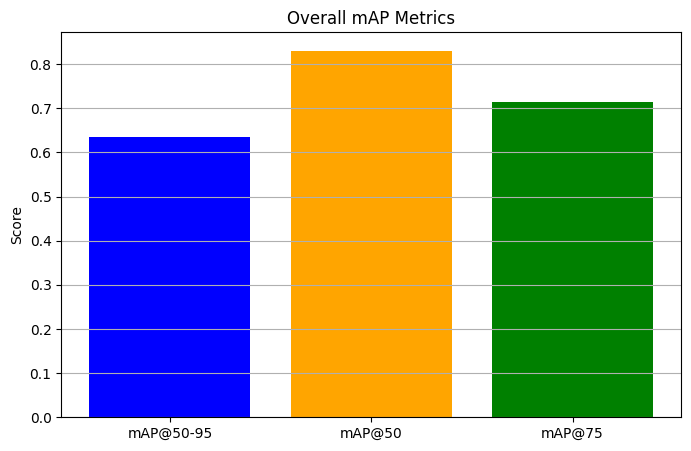

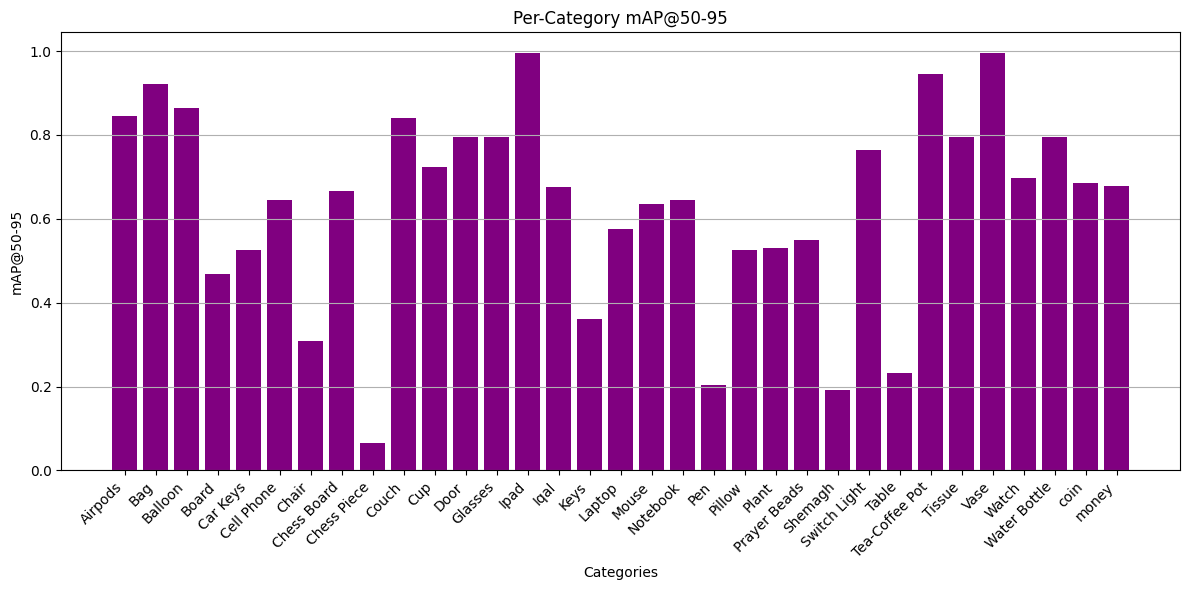

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Extract overall metrics
map50_95 = metrics.box.map  # Overall mAP 50-95
map50 = metrics.box.map50   # mAP at IoU 50
map75 = metrics.box.map75   # mAP at IoU 75
category_maps = metrics.box.maps  # List of mAP 50-95 for each category
class_names = metrics.names  # Dictionary mapping indices to class names

# Map class indices to names
class_labels = [class_names[i] for i in range(len(category_maps))]

# Overall mAP visualization
plt.figure(figsize=(8, 5))
plt.bar(['mAP@50-95', 'mAP@50', 'mAP@75'], [map50_95, map50, map75], color=['blue', 'orange', 'green'])
plt.title('Overall mAP Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

# Per-category mAP visualization
if category_maps.any():
    x_indices = np.arange(len(category_maps))

    plt.figure(figsize=(12, 6))
    plt.bar(x_indices, category_maps, color='purple')
    plt.title('Per-Category mAP@50-95')
    plt.xlabel('Categories')
    plt.ylabel('mAP@50-95')
    plt.xticks(x_indices, class_labels, rotation=45, ha="right")  # Label bars with class names
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()



In [18]:
model.names

{0: 'Airpods',
 1: 'Bag',
 2: 'Balloon',
 3: 'Board',
 4: 'Car Keys',
 5: 'Cell Phone',
 6: 'Chair',
 7: 'Chess Board',
 8: 'Chess Piece',
 9: 'Couch',
 10: 'Cup',
 11: 'Door',
 12: 'Glasses',
 13: 'Ipad',
 14: 'Iqal',
 15: 'Keys',
 16: 'Laptop',
 17: 'Mouse',
 18: 'Notebook',
 19: 'Pen',
 20: 'Pillow',
 21: 'Plant',
 22: 'Prayer Beads',
 23: 'Shemagh',
 24: 'Switch Light',
 25: 'Table',
 26: 'Tea-Coffee Pot',
 27: 'Tissue',
 28: 'Vase',
 29: 'Watch',
 30: 'Water Bottle',
 31: 'coin',
 32: 'money'}



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/104) /content/WhatsApp Video 2025-01-07 at 3.49.35 AM.mp4: 640x384 1 money, 35.8ms
video 1/1 (frame 2/104) /content/WhatsApp Video 2025-01-07 at 3.49.35 AM.mp4: 640x384 1 money, 6.1ms
video 1/1 (frame 3/104) /content/WhatsApp Video 2025-01-07 at 3.49.35 AM.mp4: 640x384 1 money, 6.0ms
video 1/1 (frame 4/104) /content/WhatsApp Video 2025-01-07 at 3.49.35 AM.mp4: 640x384 2 moneys, 6.0ms
video 1/1 (frame 5/104) /content/WhatsApp Video 20

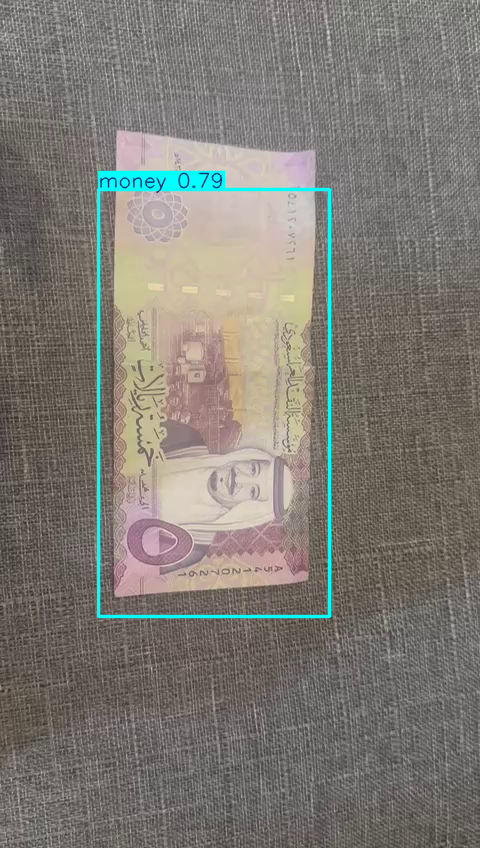

In [19]:
model.predict('/content/Money.mp4')[0].show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/140) /content/WhatsApp Video 2025-01-07 at 3.25.04 AM.mp4: 640x384 (no detections), 7.3ms
video 1/1 (frame 2/140) /content/WhatsApp Video 2025-01-07 at 3.25.04 AM.mp4: 640x384 (no detections), 7.2ms
video 1/1 (frame 3/140) /content/WhatsApp Video 2025-01-07 at 3.25.04 AM.mp4: 640x384 1 Keys, 6.2ms
video 1/1 (frame 4/140) /content/WhatsApp Video 2025-01-07 at 3.25.04 AM.mp4: 640x384 1 Keys, 6.3ms
video 1/1 (frame 5/140) /content/Whats

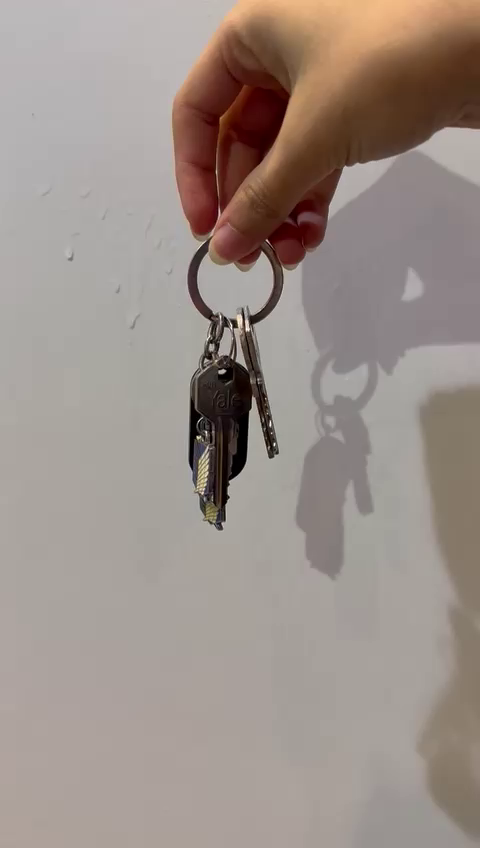

In [20]:
model.predict('/content/keys.mp4')[0].show()

In [21]:
# Create a dictionary to store the mAP@50-95 for each class
map9550_objects = {class_names[i]: category_maps[i] for i in range(len(category_maps))}

# Example printout
print("mAP@50-95 for each object:")
for object_name, map_value in map9550_objects.items():
    print(f"{object_name}: {map_value:.2f}")

# Now `map9550_objects` holds the desired structure

mAP@50-95 for each object:
Airpods: 0.85
Bag: 0.92
Balloon: 0.86
Board: 0.47
Car Keys: 0.53
Cell Phone: 0.65
Chair: 0.31
Chess Board: 0.67
Chess Piece: 0.07
Couch: 0.84
Cup: 0.72
Door: 0.80
Glasses: 0.80
Ipad: 0.99
Iqal: 0.68
Keys: 0.36
Laptop: 0.57
Mouse: 0.64
Notebook: 0.64
Pen: 0.20
Pillow: 0.53
Plant: 0.53
Prayer Beads: 0.55
Shemagh: 0.19
Switch Light: 0.76
Table: 0.23
Tea-Coffee Pot: 0.95
Tissue: 0.80
Vase: 0.99
Watch: 0.70
Water Bottle: 0.80
coin: 0.68
money: 0.68


In [22]:
import pandas as pd

# Load the Arabic-English mapping Excel file
mapping_file_path = "/content/Vocab_edited.xlsx"
mapping_df = pd.read_excel(mapping_file_path)
sum_map_by_letter = {}

# Iterate over the mapping DataFrame
for _, row in mapping_df.iterrows():
    arabic_letter = row['Arabic Letter']
    english_words = row['Objects in English'].split(', ')  # Split the list of English words

    # Sum the mAP values for the words corresponding to this Arabic letter
    total_map_for_letter = sum(map9550_objects.get(word.strip(), 0) for word in english_words)

    # Update the sum in the dictionary
    if arabic_letter in sum_map_by_letter:
        sum_map_by_letter[arabic_letter] += total_map_for_letter
    else:
        sum_map_by_letter[arabic_letter] = total_map_for_letter

# Print the result
print("Sum of mAP@50-95 values by Arabic letter:")
print(sum_map_by_letter)


Sum of mAP@50-95 values by Arabic letter:
{'ا': 3.626800535671137, 'س': 2.561040452199646, 'ش': 1.1115987744649718, 'ح': 1.4955451544254066, 'م': 4.387991868972226, 'ج': 0.6451356060606059, 'ه': 0.6451356060606059, 'ت': 1.6401356060606058, 'ك': 2.4483051849028694, 'ل': 1.2412106522609043, 'ق': 1.065395422828659, 'ص': 0.8406952688172042, 'ب': 1.6602639784946236, 'ن': 2.6880236307608127, 'ع': 1.360584329403095, 'ف': 3.1039120937662927, 'د': 1.3219472469036115, 'و': 0.5254632653061224, 'ز': 0.7644755825242718, 'ط': 0.23334381408065616}



image 1/1 /content/a.jpg: 480x640 1 Balloon, 64.3ms
Speed: 7.1ms preprocess, 64.3ms inference, 24.1ms postprocess per image at shape (1, 3, 480, 640)


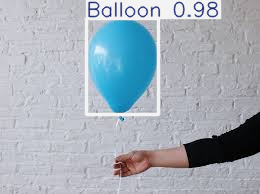

In [23]:
model.predict('/content/a.jpg')[0].show()